In [31]:
import networkx as nx
import numpy as np
import community


In [33]:
N = 200
p = 0.1
   
G_i = nx.erdos_renyi_graph(N,p)
part_i = community.best_partition(G_i)
num_commun_ = len(set(part_i.values()))
modularity_ = community.modularity(part_i, G_i)

print(num_commun_,modularity_)

10 0.17404739177908923


In [5]:
plist = np.logspace(-3.5,0,501)
N = 200
modularity_out = []
num_commun_out = []

for p in plist:
    G_i = nx.erdos_renyi_graph(N,p)
    part_i = community.best_partition(G_i)
    num_commun_out.append(len(set(part_i.values())))
    modularity_out.append(community.modularity(part_i, G_i))

Text(0.5, 0, '$p$')

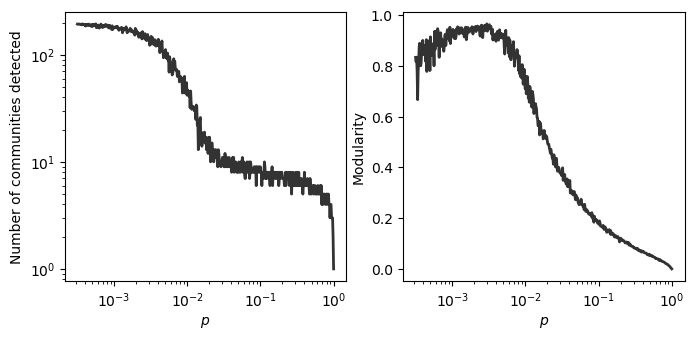

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(8,3.5),dpi=100)

ax[0].semilogx(plist, num_commun_out, color='.2', lw=2)
ax[0].set_yscale('log')
ax[0].set_ylabel('Number of communities detected')
ax[0].set_xlabel(r'$p$')

ax[1].semilogx(plist, modularity_out, color='.2', lw=2)
ax[1].set_ylabel('Modularity')
ax[1].set_xlabel(r'$p$')

In [55]:
N = 200
p = 0.1
   
G_i = nx.erdos_renyi_graph(N,p)
part_2 = nx.community.greedy_modularity_communities(G_i)

num_commun_ = len(part_2)

print(len(part_2))

5


# Switch to pymc environment:

## Create environment:

conda create -c conda-forge -n pymc_env "pymc>=4"

conda activate pymc_env

## Install additional packages:

conda config --add channels conda-forge

conda install jupyter

conda install matplotlib

conda install python-graphviz